## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

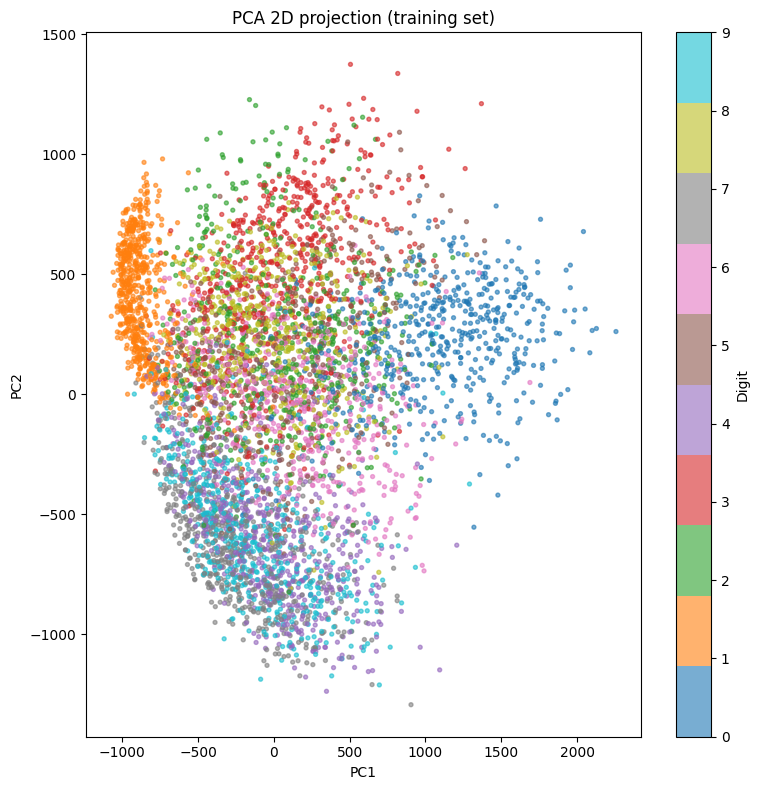

In [4]:
# Your code here
pca_2d = PCA(n_components=2, random_state=42)
X_train_pca2 = pca_2d.fit_transform(X_mnist_train)
X_test_pca2  = pca_2d.transform(X_mnist_test)

plt.figure(figsize=(8,8))
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1],
            c=y_mnist_train, s=8, alpha=0.6, cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D projection (training set)")
plt.colorbar(label="Digit")
plt.tight_layout()
plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

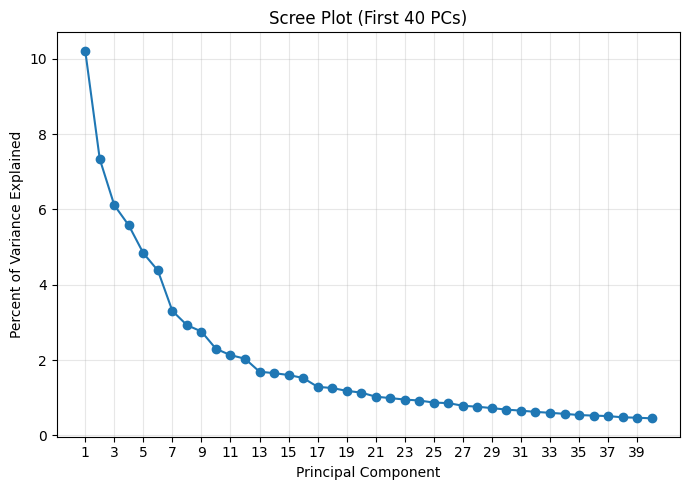

In [5]:
# Your code here
pca40 = PCA(n_components=40, random_state=42)
pca40.fit(X_mnist_train)

# Calculate the explained variance ratio for each component
evr_pct = pca40.explained_variance_ratio_ * 100

plt.figure(figsize=(7,5))
plt.plot(range(1, 41), evr_pct, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.title("Scree Plot (First 40 PCs)")
plt.xticks(range(1, 41, 2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [6]:
# Your code here
pca_full = PCA().fit(X_mnist_train)

# cumulative variance explained
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

n_components_95 = np.argmax(cum_var >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components_95}")

Number of components to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

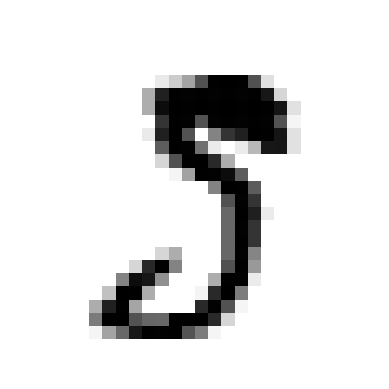

In [7]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)

    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

Original dimension: 784 | Compressed dimension: 148


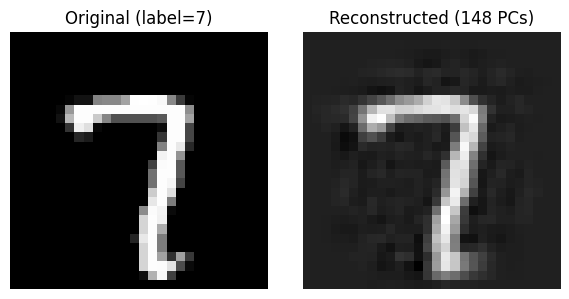

In [8]:
# Your code here
pca95 = PCA(n_components=n_components_95, random_state=42)
pca95.fit(X_mnist_train)

digit_to_show = 7
indices = np.where(y_mnist_test == digit_to_show)[0]
idx = int(indices[0]) if len(indices) > 0 else 0

x_orig = X_mnist_test[idx]
z_comp = pca95.transform([x_orig])    # compressed representation (length = n_components_95)
x_recon = pca95.inverse_transform(z_comp)[0]

print(f"Original dimension: {x_orig.shape[0]} | Compressed dimension: {z_comp.shape[1]}")

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(x_orig.reshape(28,28), cmap="gray")
plt.title(f"Original (label={y_mnist_test[idx]})")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(x_recon.reshape(28,28), cmap="gray")
plt.title(f"Reconstructed ({n_components_95} PCs)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [9]:
# Your code here
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- Baseline: KNN on original features ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_mnist_train, y_mnist_train)
y_pred_raw = knn_raw.predict(X_mnist_test)
acc_raw = accuracy_score(y_mnist_test, y_pred_raw)
print(f"Baseline KNN (no PCA) accuracy: {acc_raw:.4f}")

# --- PCA: keep ~80% variance, then KNN on reduced features ---
pca80 = PCA(n_components=0.80, random_state=42)   # choose PCs to retain ~80% variance
X_train_pca80 = pca80.fit_transform(X_mnist_train)
X_test_pca80  = pca80.transform(X_mnist_test)

print(f"Number of PCs chosen to reach ~80%: {pca80.n_components_}")
print(f"Actual variance kept: {pca80.explained_variance_ratio_.sum():.3f}")

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca80)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(f"KNN with PCA(~80% var) accuracy: {acc_pca:.4f}")

Baseline KNN (no PCA) accuracy: 0.9421
Number of PCs chosen to reach ~80%: 42
Actual variance kept: 0.802
KNN with PCA(~80% var) accuracy: 0.9529


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


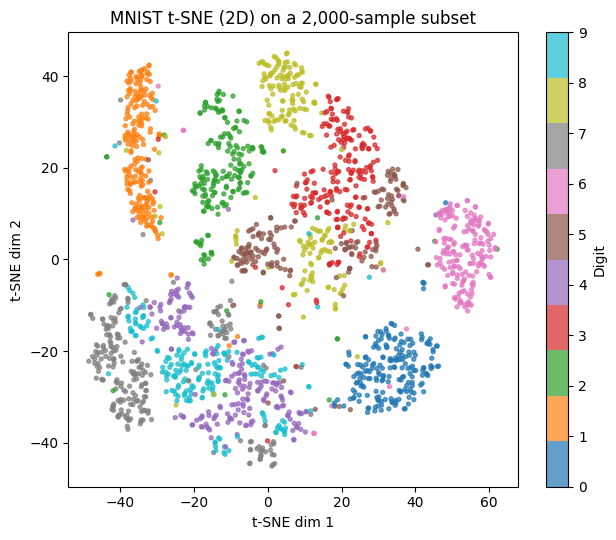

In [10]:
# Your code here
from sklearn.manifold import TSNE

rng = np.random.default_rng(42)
n_plot = min(2000, X_mnist_train.shape[0])
idx = rng.choice(X_mnist_train.shape[0], size=n_plot, replace=False)

X_sample = X_mnist_train[idx]
y_sample = y_mnist_train[idx]

pca50 = PCA(n_components=50, random_state=42)
X_pca50 = pca50.fit_transform(X_sample)

# 3) t-SNE to 2D
tsne = TSNE(
    n_components=2,
    perplexity=30,           # works well for ~2k points
    learning_rate="auto",
    init="pca",
    random_state=42,
    n_iter=1000,
    verbose=0
)
X_tsne2 = tsne.fit_transform(X_pca50)

# 4) Plot (colored by digit)
plt.figure(figsize=(6.5, 5.5))
sc = plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1],
                 c=y_sample, s=8, alpha=0.7, cmap="tab10")
plt.title("MNIST t-SNE (2D) on a 2,000-sample subset")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
cbar = plt.colorbar(sc)
cbar.set_label("Digit")
plt.tight_layout()
plt.show()

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [11]:
# Your code here
from sklearn.model_selection import train_test_split

X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(
    X_tsne2, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)

# Fit KNN on the 2D t-SNE data
knn_tsne = KNeighborsClassifier(n_neighbors=5)
knn_tsne.fit(X_tsne_train, y_tsne_train)

# Predict
y_pred_tsne = knn_tsne.predict(X_tsne_test)
acc_tsne = accuracy_score(y_tsne_test, y_pred_tsne)
print(f"KNN accuracy using t-SNE (2D): {acc_tsne:.4f}")

KNN accuracy using t-SNE (2D): 0.8975


t-SNE is used for visualizing and not as features, but looking at the result 89% accuracy is not bad, meaning it preserved enough neighbours to allow KNN to correctly group many digits together in 2D space, even though most of the original high-dimensional detail was lost.

## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [12]:

# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


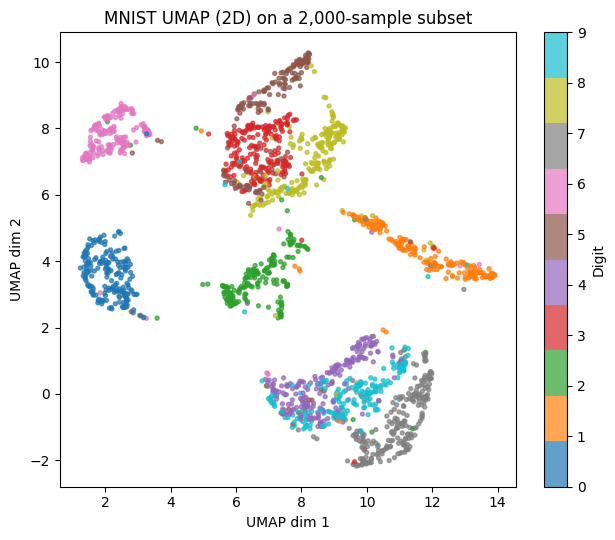

In [14]:
# Your code here
import numpy as np
from umap import UMAP

rng = np.random.default_rng(42)
n_plot = min(2000, X_mnist_train.shape[0])
idx = rng.choice(X_mnist_train.shape[0], size=n_plot, replace=False)
X_sample = X_mnist_train[idx]
y_sample = y_mnist_train[idx]

# 2) (Optional) PCA to 50 dims to denoise/speed up UMAP
X_pca50 = PCA(n_components=50, random_state=42).fit_transform(X_sample)

# 3) UMAP to 2D
umap_model = UMAP(
    n_components=2,
    n_neighbors=15,   # local neighborhood size
    min_dist=0.1,     # how tight the clusters look
    metric="euclidean",
    random_state=42
)
X_umap2 = umap_model.fit_transform(X_pca50)

# 4) Plot
plt.figure(figsize=(6.5, 5.5))
sc = plt.scatter(X_umap2[:, 0], X_umap2[:, 1],
                 c=y_sample, s=8, alpha=0.7, cmap="tab10")
plt.title("MNIST UMAP (2D) on a 2,000-sample subset")
plt.xlabel("UMAP dim 1")
plt.ylabel("UMAP dim 2")
cbar = plt.colorbar(sc)
cbar.set_label("Digit")
plt.tight_layout()
plt.show()

Now, calculate accuracy with KNN.

In [15]:
# Your code here
X_tr, X_te, y_tr, y_te = train_test_split(
    X_umap2, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_te)
acc = accuracy_score(y_te, y_pred)
print(f"KNN accuracy on UMAP (2D) subset: {acc:.4f}")

KNN accuracy on UMAP (2D) subset: 0.8750


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


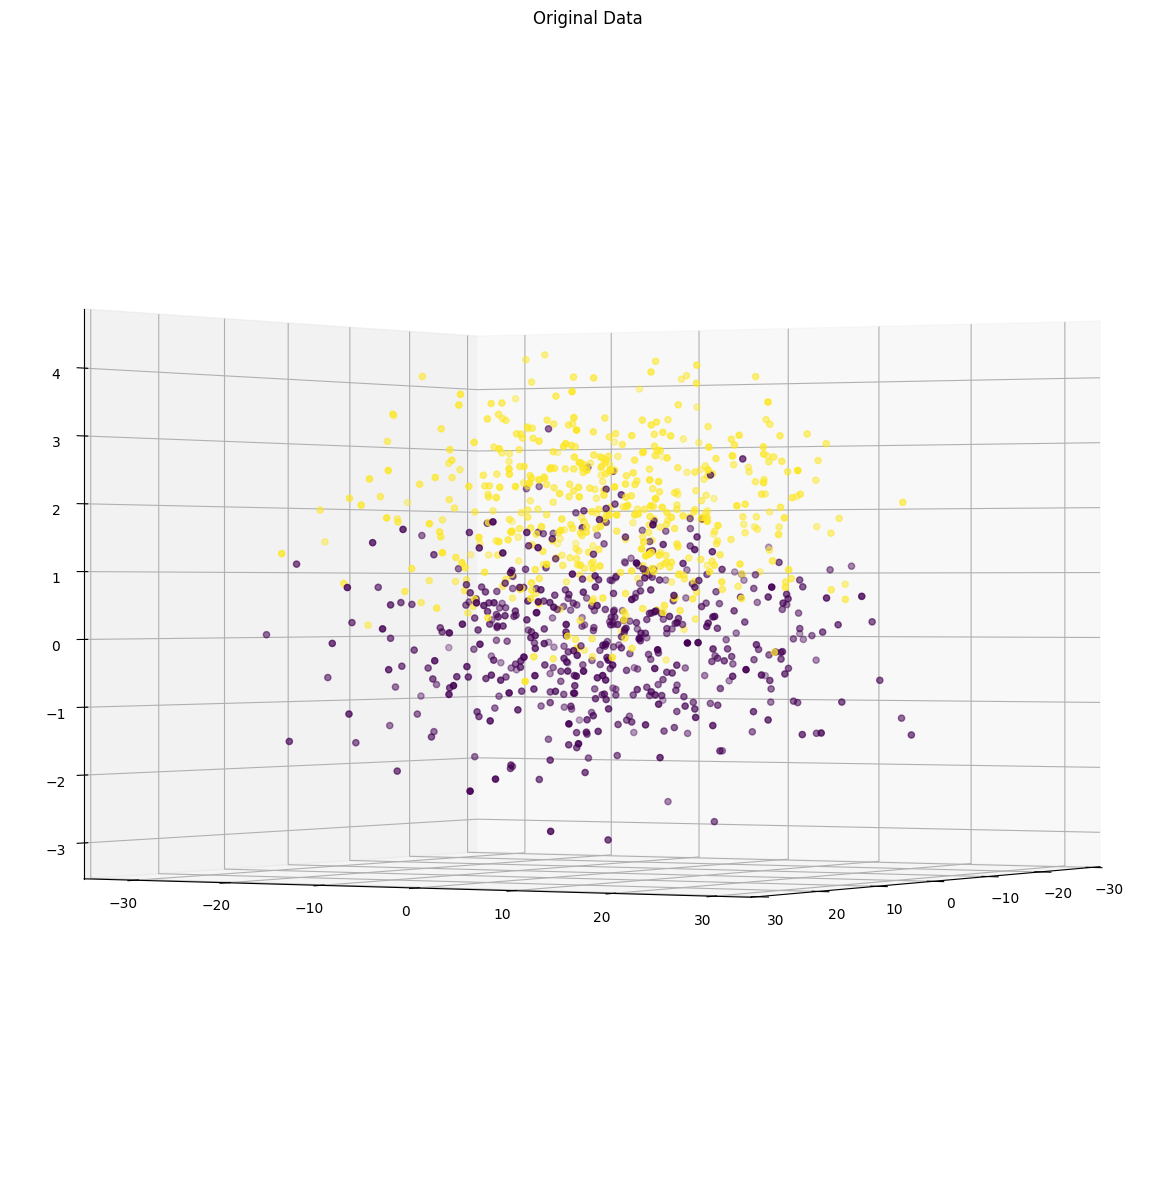

In [16]:
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [17]:
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [18]:
# Your code here
pca_dims = [1, 2, 3]  # trying different output dimensions
results_pca = []

for k in pca_dims:
    pca = PCA(n_components=k, random_state=42)
    Xtr = pca.fit_transform(X_train)
    Xte = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(Xtr, y_train)
    y_pred = knn.predict(Xte)
    acc = accuracy_score(y_test, y_pred)
    results_pca.append((k, acc))

print("PCA -> KNN accuracies:")
for k, acc in results_pca:
    print(f"  PCA {k}D: accuracy = {acc:.4f}")

PCA -> KNN accuracies:
  PCA 1D: accuracy = 0.4850
  PCA 2D: accuracy = 0.5050
  PCA 3D: accuracy = 0.7250


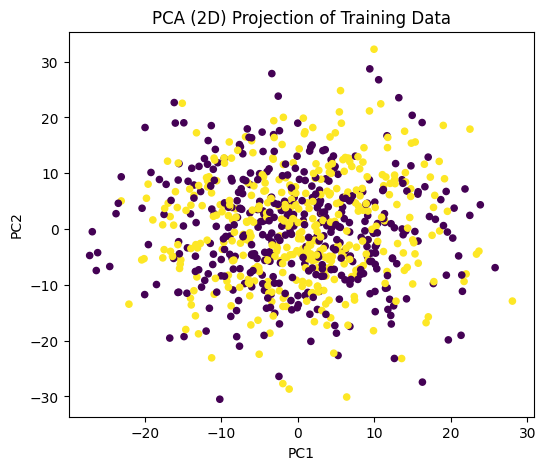

In [20]:
# Your code here
plt.figure(figsize=(6,5))
plt.scatter(Xtr[:,0], Xtr[:,1], c=y_train, cmap="viridis", s=20)
plt.title("PCA (2D) Projection of Training Data")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

2. Try with UMAP.

In [21]:
# Your code here
umap_dims = [2, 3]                # try 2D and 3D embeddings
umap_neighbors = [5, 15, 30]      # local neighborhood sizes
umap_min_dist = [0.0, 0.5, 0.99]  # cluster tightness

results_umap = []

for d in umap_dims:
    for nn in umap_neighbors:
        for md in umap_min_dist:
            umap_model = UMAP(
                n_components=d,
                n_neighbors=nn,
                min_dist=md,
                metric="euclidean",
                random_state=42
            )
            # Fit on TRAIN only
            Xtr_umap = umap_model.fit_transform(X_train)

            # Try to transform TEST (some older versions may not support .transform)
            try:
                Xte_umap = umap_model.transform(X_test)
                eval_on_test = True
            except Exception:
                # Fallback: evaluate on a validation split from the train embedding
                eval_on_test = False

            knn = KNeighborsClassifier(n_neighbors=5)

            if eval_on_test:
                knn.fit(Xtr_umap, y_train)
                y_pred = knn.predict(Xte_umap)
                acc = accuracy_score(y_test, y_pred)
                scope = "test"
            else:
                # No transform: do a hold-out validation on TRAIN embedding
                from sklearn.model_selection import train_test_split
                X_tr, X_val, y_tr, y_val = train_test_split(
                    Xtr_umap, y_train, test_size=0.2, random_state=42, stratify=y_train
                )
                knn.fit(X_tr, y_tr)
                y_pred = knn.predict(X_val)
                acc = accuracy_score(y_val, y_pred)
                scope = "train/val"

            results_umap.append((d, nn, md, acc, scope))

print("UMAP -> KNN accuracies:")
for d, nn, md, acc, scope in results_umap:
    print(f"  UMAP {d}D | n_neighbors={nn:>2} | min_dist={md:>4} -> accuracy={acc:.4f} ({scope})")

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

UMAP -> KNN accuracies:
  UMAP 2D | n_neighbors= 5 | min_dist= 0.0 -> accuracy=0.6500 (test)
  UMAP 2D | n_neighbors= 5 | min_dist= 0.5 -> accuracy=0.6050 (test)
  UMAP 2D | n_neighbors= 5 | min_dist=0.99 -> accuracy=0.5950 (test)
  UMAP 2D | n_neighbors=15 | min_dist= 0.0 -> accuracy=0.6200 (test)
  UMAP 2D | n_neighbors=15 | min_dist= 0.5 -> accuracy=0.5550 (test)
  UMAP 2D | n_neighbors=15 | min_dist=0.99 -> accuracy=0.5650 (test)
  UMAP 2D | n_neighbors=30 | min_dist= 0.0 -> accuracy=0.5350 (test)
  UMAP 2D | n_neighbors=30 | min_dist= 0.5 -> accuracy=0.5400 (test)
  UMAP 2D | n_neighbors=30 | min_dist=0.99 -> accuracy=0.5400 (test)
  UMAP 3D | n_neighbors= 5 | min_dist= 0.0 -> accuracy=0.6600 (test)
  UMAP 3D | n_neighbors= 5 | min_dist= 0.5 -> accuracy=0.6500 (test)
  UMAP 3D | n_neighbors= 5 | min_dist=0.99 -> accuracy=0.6350 (test)
  UMAP 3D | n_neighbors=15 | min_dist= 0.0 -> accuracy=0.5950 (test)
  UMAP 3D | n_neighbors=15 | min_dist= 0.5 -> accuracy=0.5900 (test)
  UMAP 3D 

In [ ]:
# Your code here


Explain your results in the cell below.  Which works better?  Why?

*Enter your answer in this cell*

UMAP 2D 0.65% at best did better than PCA 1&2D because it keeps nearby points together, forming tighter clusters in 2D. Still, it did not beat PCA 3D (~0.73).

PCA (3D) works the best with ~73% accuracy, better than any of the UMAP accuracies. This indicates that dataset differs mostly along one straight line.
